# Creating the London and Merseyside CSVs

In [ ]:

import os
import pandas as pd # type: ignore


In [58]:
path = '../data/police_zips'    



# find all csv file paths
csv_names = []
for folder in os.listdir(path):
        
            folder_contents = os.listdir(f'{path}/{folder}')
            
            for file in folder_contents:
                
                    
                csv_names.append(f'{path}/{folder}/{file}')



csv_names
        

['../data/police_zips/2022-01/2022-01-city-of-london-outcomes.csv',
 '../data/police_zips/2022-01/2022-01-city-of-london-stop-and-search.csv',
 '../data/police_zips/2022-01/2022-01-city-of-london-street.csv',
 '../data/police_zips/2022-01/2022-01-merseyside-outcomes.csv',
 '../data/police_zips/2022-01/2022-01-merseyside-stop-and-search.csv',
 '../data/police_zips/2022-01/2022-01-merseyside-street.csv',
 '../data/police_zips/2022-01/2022-01-metropolitan-outcomes.csv',
 '../data/police_zips/2022-01/2022-01-metropolitan-stop-and-search.csv',
 '../data/police_zips/2022-01/2022-01-metropolitan-street.csv',
 '../data/police_zips/2022-02/2022-02-city-of-london-outcomes.csv',
 '../data/police_zips/2022-02/2022-02-city-of-london-stop-and-search.csv',
 '../data/police_zips/2022-02/2022-02-city-of-london-street.csv',
 '../data/police_zips/2022-02/2022-02-merseyside-outcomes.csv',
 '../data/police_zips/2022-02/2022-02-merseyside-stop-and-search.csv',
 '../data/police_zips/2022-02/2022-02-merseysid

# Extract the CSV's

In [59]:
london_ss = []
london_crimes = []
london_outcomes = []

merseyside_ss = []
merseyside_crimes = []
merseyside_outcomes = []


for csv in csv_names:
 

    # City of London Data
    if csv.endswith('city-of-london-stop-and-search.csv'):
        london_ss.append(pd.read_csv(csv))

    elif csv.endswith('city-of-london-street.csv'):
        london_crimes.append(pd.read_csv(csv))

    elif csv.endswith('city-of-london-outcomes.csv'):
        london_outcomes.append(pd.read_csv(csv))



    # MET Polcie Data
    elif csv.endswith('metropolitan-stop-and-search.csv'):
        london_ss.append(pd.read_csv(csv))

    elif csv.endswith('metropolitan-street.csv'):
        london_crimes.append(pd.read_csv(csv))

    elif csv.endswith('metropolitan-outcomes.csv'):
        london_outcomes.append(pd.read_csv(csv))


    # Merseyside Data
    elif csv.endswith('merseyside-stop-and-search.csv'):
        merseyside_ss.append(pd.read_csv(csv))

    elif csv.endswith('merseyside-street.csv'):
        merseyside_crimes.append(pd.read_csv(csv))

    elif csv.endswith('merseyside-outcomes.csv'):
        merseyside_outcomes.append(pd.read_csv(csv))





# Convert to Pandas df
london_ss_df = pd.concat(london_ss, ignore_index=True)
london_crimes_df = pd.concat(london_crimes, ignore_index=True)
london_outcomes_df = pd.concat(london_outcomes, ignore_index=True)

# Convert to Pandas df
merseyside_ss_df = pd.concat(merseyside_ss, ignore_index=True)
merseyside_crimes_df = pd.concat(merseyside_crimes, ignore_index=True)
merseyside_outcomes_df = pd.concat(merseyside_outcomes, ignore_index=True)

### Combine the crime and outcomes by 'CRIME ID'

In [60]:
# merge London crimes with outcomes
london_outcomes_filtered = london_outcomes_df[['Crime ID', 'Outcome type']]  # Select only necessary columns
london_crimes_with_outcomes = london_crimes_df.merge(london_outcomes_filtered, on='Crime ID', how='left')


# merge Merseyside crimes with outcomes
merseyside_outcomes_filtered = merseyside_outcomes_df[['Crime ID', 'Outcome type']]  # Select only necessary columns
merseyside_crimes_with_outcomes = merseyside_crimes_df.merge(merseyside_outcomes_filtered, on='Crime ID', how='left')

display(london_crimes_with_outcomes)
display(merseyside_crimes_with_outcomes)

,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type,Last outcome category,Context,Outcome type
0,f344b946a36b4dc1db0a4bb889e8ec0fd23ab65aa2bf39...,2022-01,City of London Police,City of London Police,-0.106453,51.518207,On or near Charterhouse Street,E01000916,Camden 027B,Burglary,Status update unavailable,NaN,NaN
1,e74962917ce995fa9e52623b6fe0c218619b79d4a22550...,2022-01,City of London Police,City of London Police,-0.113256,51.516824,On or near Old Square,E01000914,Camden 028B,Other theft,Investigation complete; no suspect identified,NaN,Investigation complete; no suspect identified
2,e74962917ce995fa9e52623b6fe0c218619b79d4a22550...,2022-01,City of London Police,City of London Police,-0.113256,51.516824,On or near Old Square,E01000914,Camden 028B,Other theft,Investigation complete; no suspect identified,NaN,Investigation complete; no suspect identified
3,067092d6822753127ce767d011ea5c5b4375de6f5a3c48...,2022-01,City of London Police,City of London Police,-0.116100,51.518470,On or near Supermarket,E01000914,Camden 028B,Other theft,Status update unavailable,NaN,NaN
4,NaN,2022-01,City of London Police,City of London Police,-0.097601,51.520699,On or near Carthusian Street,E01000001,City of London 001A,Anti-social behaviour,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3804644,36fcabb2c063f186635356d58681862de06217035a0bb3...,2024-12,Metropolitan Police Service,Metropolitan Police Service,-2.103086,52.600139,On or near Bushbury Road,E01010477,Wolverhampton 015F,Theft from the person,Investigation complete; no suspect identified,NaN,Investigation complete; no suspect identified
3804645,7ddc1e3986e95f45c240b18f83bd691f6d9e1ffd48119c...,2024-12,Metropolitan Police Service,Metropolitan Police Service,-2.093462,52.587606,On or near Dean'S Road,E01010447,Wolverhampton 018E,Theft from the person,Investigation complete; no suspect identified,NaN,Investigation complete; no suspect identified
3804646,01bad260b814aa7814b61aff2c75d1df1141ad833cfa92...,2024-12,Metropolitan Police Service,Metropolitan Police Service,-2.139659,52.577474,On or near Bristol Street,E01010466,Wolverhampton 020D,Violence and sexual offences,Under investigation,NaN,NaN
3804647,67990b567541935fba7d1be7d072c0da6e6a97485e495a...,2024-12,Metropolitan Police Service,Metropolitan Police Service,-2.209463,52.193978,On or near Parking Area,E01032292,Worcester 011B,Theft from the person,Under investigation,NaN,NaN


,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type,Last outcome category,Context,Outcome type
0,188630597ba32ec3a48e435ed630c2c7ddcbbd7ab566e1...,2022-01,Merseyside Police,Merseyside Police,-2.747770,53.389499,On or near Cronton Road,E01012393,Halton 001B,Other theft,Investigation complete; no suspect identified,NaN,Investigation complete; no suspect identified
1,NaN,2022-01,Merseyside Police,Merseyside Police,-2.873954,53.490619,On or near Foscote Road,E01006448,Knowsley 001A,Anti-social behaviour,NaN,NaN,NaN
2,7d44233b18e6a0501a7b496c2c15b79018b681d09a20e8...,2022-01,Merseyside Police,Merseyside Police,-2.869972,53.488240,On or near Roman Way,E01006448,Knowsley 001A,Criminal damage and arson,Unable to prosecute suspect,NaN,Unable to prosecute suspect
3,729dd8c77994445761ba9589434952268b387dc8fe96c7...,2022-01,Merseyside Police,Merseyside Police,-2.871911,53.488019,On or near Quernmore Walk,E01006448,Knowsley 001A,Criminal damage and arson,Investigation complete; no suspect identified,NaN,Investigation complete; no suspect identified
4,4cd44554b08a48a452382e2fb9391fa488502b980e1255...,2022-01,Merseyside Police,Merseyside Police,-2.869654,53.486687,On or near Birbeck Road,E01006448,Knowsley 001A,Criminal damage and arson,Investigation complete; no suspect identified,NaN,Investigation complete; no suspect identified
...,...,...,...,...,...,...,...,...,...,...,...,...,...
521093,25a66928d9c7773c1bdb3030c00dad73b2f5df1f7beb3d...,2024-12,Merseyside Police,Merseyside Police,-2.976919,53.306385,On or near Picton Close,E01007168,Wirral 042D,Violence and sexual offences,Under investigation,NaN,NaN
521094,106749a5a3a6814ca007112c6c269400f58ad799def673...,2024-12,Merseyside Police,Merseyside Police,-2.963434,53.308032,On or near Pickmere Drive,E01007169,Wirral 042E,Other theft,Investigation complete; no suspect identified,NaN,Investigation complete; no suspect identified
521095,c755a789e6de3bf9271da4409cfd33ac6bbbad895e7d9d...,2024-12,Merseyside Police,Merseyside Police,-2.966713,53.308329,On or near Tarvin Road,E01007169,Wirral 042E,Violence and sexual offences,Under investigation,NaN,NaN
521096,66db92cc4acdd59ba392a6fc9e9e1caa5f61de40fd0f3b...,2024-12,Merseyside Police,Merseyside Police,-2.965022,53.311884,On or near Parking Area,E01007169,Wirral 042E,Violence and sexual offences,Investigation complete; no suspect identified,NaN,Investigation complete; no suspect identified


### Convert to datetime


In [61]:
# Convert the date column to datetime format
london_crimes_with_outcomes['Date'] = pd.to_datetime(london_crimes_with_outcomes['Month'], format= '%Y-%m')
london_ss_df['Date'] = pd.to_datetime(london_ss_df['Date']).dt.tz_convert(None) # convert to datetime and remove timezone
london_ss_df.drop(columns=['Part of a policing operation', 'Policing operation'], inplace=True)


merseyside_crimes_with_outcomes['Date'] = pd.to_datetime(merseyside_crimes_with_outcomes['Month'], format= '%Y-%m')
merseyside_ss_df['Date'] = pd.to_datetime(merseyside_ss_df['Date']).dt.tz_convert(None) # convert to datetime and remove timezone
merseyside_ss_df.drop(columns=['Part of a policing operation', 'Policing operation'], inplace=True) # remove empty columns




## Save to CSV

In [63]:
years = london_ss_df['Date'].dt.year.value_counts().index
ss_path = '../data/stop_and_search/'
crime_path = '../data/crime/'


for year in years:
    london_ss_df[london_ss_df['Date'].dt.year == year].to_csv(f'{ss_path}london_stop_and_search_{year}.csv', index=False)
    merseyside_ss_df[merseyside_ss_df['Date'].dt.year == year].to_csv(f'{ss_path}merseyside_stop_and_search_{year}.csv', index=False)


    merseyside_crimes_with_outcomes[merseyside_crimes_with_outcomes['Date'].dt.year == year].to_csv(f'{crime_path}merseyside_crime_{year}.csv', index=False)
    london_crimes_with_outcomes[london_crimes_with_outcomes['Date'].dt.year == year].to_csv(f'{crime_path}london_crime_{year}.csv', index=False)


# Adding LSOA to Crime Data

In [87]:
LSOA_df = pd.read_csv('../data/mapping_csvs/LSOA_to_coords.csv')

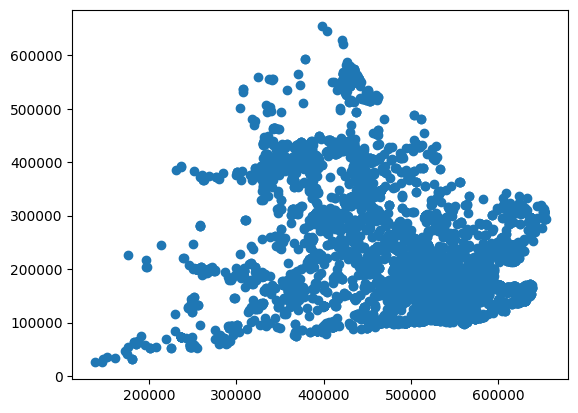

In [89]:
# Rename a single column

import matplotlib.pyplot as plt
LSOA_df = LSOA_df.rename(columns={'LSOA01CD': 'LSOA code'})




data = london_crimes_with_outcomes.merge(LSOA_df, on='LSOA code', how='left')

plt.scatter(data['x'], data['y'])


In [90]:
data

,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type,Last outcome category,Context,Outcome type,Date,FID,LSOA01NM,GlobalID,x,y
0,f344b946a36b4dc1db0a4bb889e8ec0fd23ab65aa2bf39...,2022-01,City of London Police,City of London Police,-0.106453,51.518207,On or near Charterhouse Street,E01000916,Camden 027B,Burglary,Status update unavailable,NaN,NaN,2022-01-01,916.0,Camden 027B,247d823f-9929-4f6c-88e9-7f77b7c3e879,531258.0,181945.0
1,e74962917ce995fa9e52623b6fe0c218619b79d4a22550...,2022-01,City of London Police,City of London Police,-0.113256,51.516824,On or near Old Square,E01000914,Camden 028B,Other theft,Investigation complete; no suspect identified,NaN,Investigation complete; no suspect identified,2022-01-01,914.0,Camden 028B,9cf9dcb5-4b80-48ff-97b9-487a3f616a4a,530693.0,181780.0
2,e74962917ce995fa9e52623b6fe0c218619b79d4a22550...,2022-01,City of London Police,City of London Police,-0.113256,51.516824,On or near Old Square,E01000914,Camden 028B,Other theft,Investigation complete; no suspect identified,NaN,Investigation complete; no suspect identified,2022-01-01,914.0,Camden 028B,9cf9dcb5-4b80-48ff-97b9-487a3f616a4a,530693.0,181780.0
3,067092d6822753127ce767d011ea5c5b4375de6f5a3c48...,2022-01,City of London Police,City of London Police,-0.116100,51.518470,On or near Supermarket,E01000914,Camden 028B,Other theft,Status update unavailable,NaN,NaN,2022-01-01,914.0,Camden 028B,9cf9dcb5-4b80-48ff-97b9-487a3f616a4a,530693.0,181780.0
4,NaN,2022-01,City of London Police,City of London Police,-0.097601,51.520699,On or near Carthusian Street,E01000001,City of London 001A,Anti-social behaviour,NaN,NaN,NaN,2022-01-01,1.0,City of London 001A,3f778391-d557-47f0-91ab-257ee265c5c6,532182.0,181785.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3804644,36fcabb2c063f186635356d58681862de06217035a0bb3...,2024-12,Metropolitan Police Service,Metropolitan Police Service,-2.103086,52.600139,On or near Bushbury Road,E01010477,Wolverhampton 015F,Theft from the person,Investigation complete; no suspect identified,NaN,Investigation complete; no suspect identified,2024-12-01,10477.0,Wolverhampton 015F,c6a3a1c4-ab91-491a-92eb-97fb3dff7c43,393091.0,300231.0
3804645,7ddc1e3986e95f45c240b18f83bd691f6d9e1ffd48119c...,2024-12,Metropolitan Police Service,Metropolitan Police Service,-2.093462,52.587606,On or near Dean'S Road,E01010447,Wolverhampton 018E,Theft from the person,Investigation complete; no suspect identified,NaN,Investigation complete; no suspect identified,2024-12-01,10447.0,Wolverhampton 018E,adffdf4a-7048-4b3d-bdf4-d98705a0325a,393721.0,298666.0
3804646,01bad260b814aa7814b61aff2c75d1df1141ad833cfa92...,2024-12,Metropolitan Police Service,Metropolitan Police Service,-2.139659,52.577474,On or near Bristol Street,E01010466,Wolverhampton 020D,Violence and sexual offences,Under investigation,NaN,NaN,2024-12-01,10466.0,Wolverhampton 020D,52fe00ad-8057-445f-9565-a4e6e8cc5b31,390425.0,297677.0
3804647,67990b567541935fba7d1be7d072c0da6e6a97485e495a...,2024-12,Metropolitan Police Service,Metropolitan Police Service,-2.209463,52.193978,On or near Parking Area,E01032292,Worcester 011B,Theft from the person,Under investigation,NaN,NaN,2024-12-01,32292.0,Worcester 011B,9846f867-d9f7-4e9e-80e8-35132c92e8d7,385732.0,254628.0
